<img src="https://drive.google.com/uc?export=view&id=1wYSMgJtARFdvTt5g7E20mE4NmwUFUuog" width="200">

[![Build Fast with AI](https://img.shields.io/badge/BuildFastWithAI-GenAI%20Bootcamp-blue?style=for-the-badge&logo=artificial-intelligence)](https://www.buildfastwithai.com/genai-course)
[![EduChain GitHub](https://img.shields.io/github/stars/satvik314/educhain?style=for-the-badge&logo=github&color=gold)](https://github.com/satvik314/educhain)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1jDaqiq0sISUw0LKfFQ4QkUjgXTuv0ahX?usp=sharing)
## Master Generative AI in 6 Weeks
**What You'll Learn:**
- Build with Latest LLMs
- Create Custom AI Apps
- Learn from Industry Experts
- Join Innovation Community
Transform your AI ideas into reality through hands-on projects and expert mentorship.
[Start Your Journey](https://www.buildfastwithai.com/genai-course)
*Empowering the Next Generation of AI Innovators

# **LangGraph Multi-Agent Swarm**  
A Python library for creating swarm-style multi-agent systems using LangGraph. A swarm is a type of multi-agent architecture where agents dynamically hand off control to one another based on their specializations. The system remembers which agent was last active, ensuring that on subsequent interactions, the conversation resumes with that agent.  

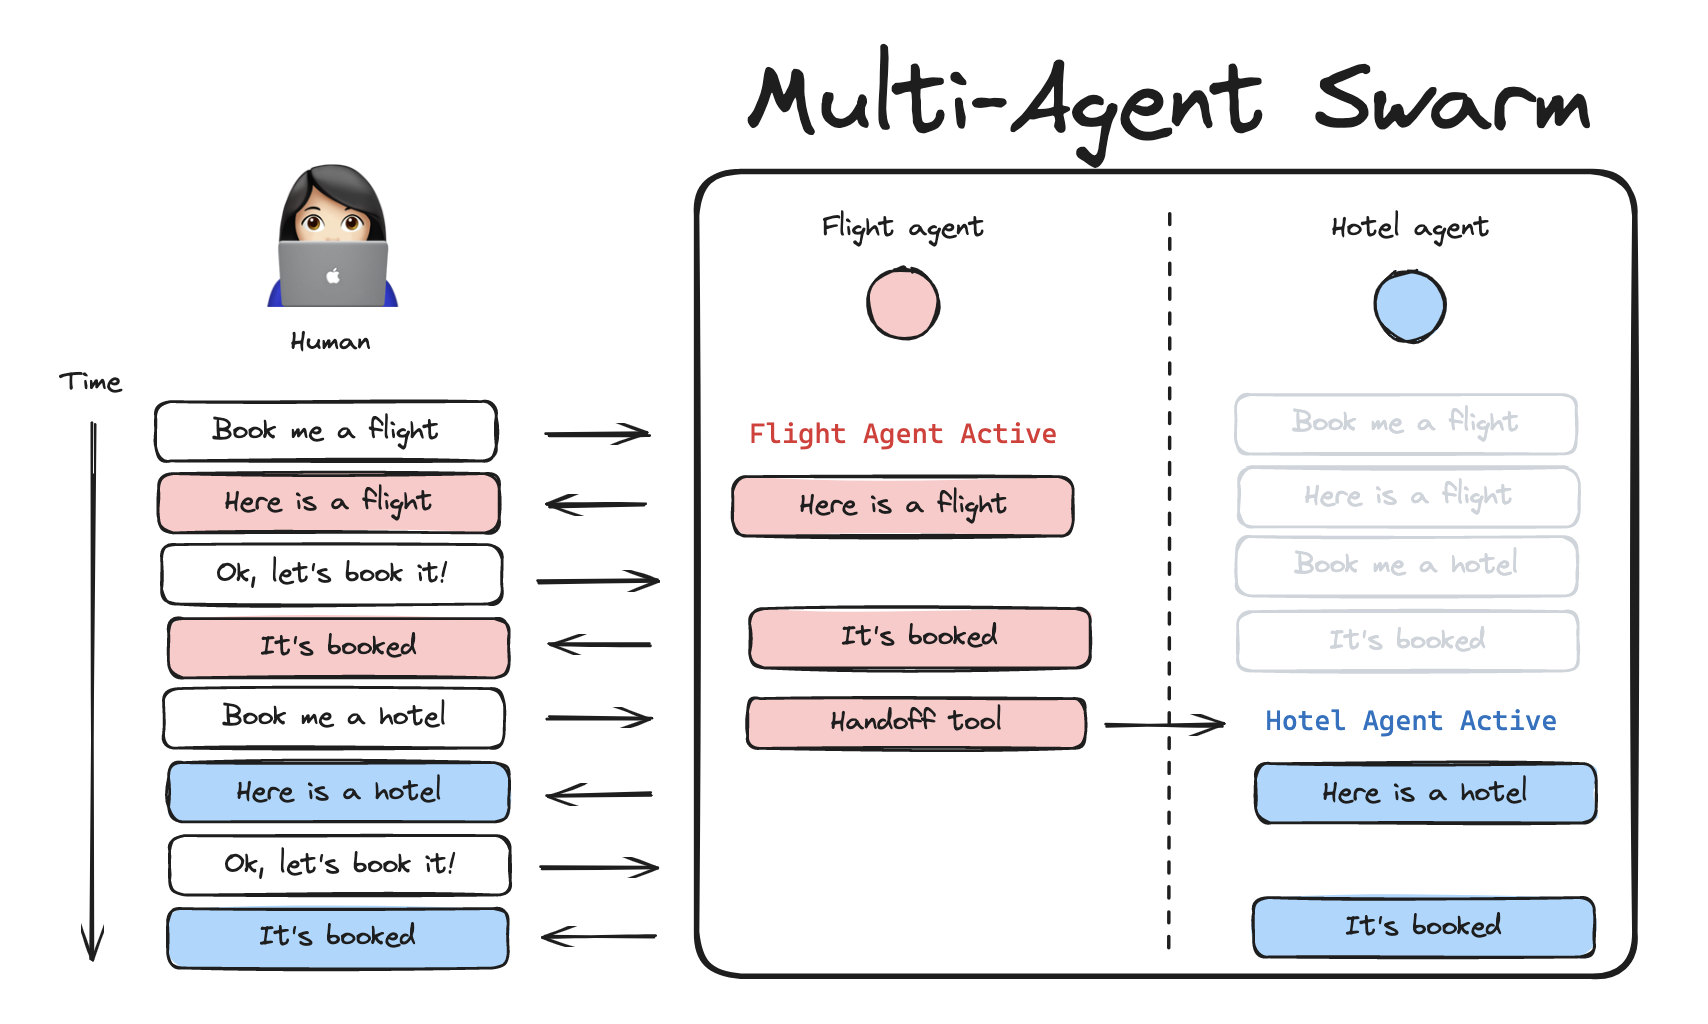

## **Features**  
✅ **Multi-agent collaboration** - Enable specialized agents to work together and hand off context to each other  
✅ **Customizable handoff tools** - Built-in tools for communication between agents  

This library is built on top of **LangGraph**, a powerful framework for building agent applications, and comes with out-of-box support for:  
- **Streaming**  
- **Short-term and long-term memory**  
- **Human-in-the-loop**

### 📦 **Dependency Installation**  








In [ ]:
pip install langgraph-swarm langchain-openai

### **🔧 Setup API Key**




In [ ]:
import os
from google.colab import userdata

os.environ['OPENAI_API_KEY']=userdata.get('OPENAI_API_KEY')

### **LangGraph Swarm Agent Setup**








In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt import create_react_agent
from langgraph_swarm import create_handoff_tool, create_swarm

### **🤖 Setting Up ChatOpenAI Model**








In [ ]:
model = ChatOpenAI(model="gpt-4o")

### **➕ Function to Add Two Numbers**








In [ ]:
def add(a: int, b: int) -> int:
    """Add two numbers"""
    return a + b

### **🧠 Creating React Agents: Alice & Bob**








In [ ]:
alice = create_react_agent(
    model,
    [add, create_handoff_tool(agent_name="Bob")],
    prompt="You are Alice, an addition expert.",
    name="Alice",
)

bob = create_react_agent(
    model,
    [create_handoff_tool(agent_name="Alice", description="Transfer to Alice, she can help with math")],
    prompt="You are Bob, you speak like a pirate.",
    name="Bob",
)

### **🔄 Creating Swarm Workflow with Checkpointing**








In [ ]:
checkpointer = InMemorySaver()
workflow = create_swarm(
    [alice, bob],
    default_active_agent="Alice"
)
app = workflow.compile(checkpointer=checkpointer)

### **🛠️ Configuring and Invoking the Swarm App**








In [ ]:
config = {"configurable": {"thread_id": "1"}}
turn_1 = app.invoke(
    {"messages": [{"role": "user", "content": "i'd like to speak to Bob"}]},
    config,
)
print(turn_1)

{'messages': [HumanMessage(content="i'd like to speak to Bob", additional_kwargs={}, response_metadata={}, id='06708f1a-cb03-4864-81fa-ea970d6466f7'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bZyDwhZXYbJDJUaR7ydn2xTe', 'function': {'arguments': '{}', 'name': 'transfer_to_bob'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 77, 'total_tokens': 90, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Alice', id='run-ead7904e-d3f1-41f9-b2d2-680bb6e38040-0', tool_calls=[{'name': 'transfer_to_bob', 'args': {}, 'id': 'call_bZyDwhZXYbJDJUaR7ydn2xTe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 77, 'output_t

### **🔢 Invoking the Swarm App for Math Query**








In [ ]:
turn_2 = app.invoke(
    {"messages": [{"role": "user", "content": "what's 5 + 7?"}]},
    config,
)
print(turn_2)

{'messages': [HumanMessage(content="i'd like to speak to Bob", additional_kwargs={}, response_metadata={}, id='06708f1a-cb03-4864-81fa-ea970d6466f7'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_bZyDwhZXYbJDJUaR7ydn2xTe', 'function': {'arguments': '{}', 'name': 'transfer_to_bob'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 77, 'total_tokens': 90, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, name='Alice', id='run-ead7904e-d3f1-41f9-b2d2-680bb6e38040-0', tool_calls=[{'name': 'transfer_to_bob', 'args': {}, 'id': 'call_bZyDwhZXYbJDJUaR7ydn2xTe', 'type': 'tool_call'}], usage_metadata={'input_tokens': 77, 'output_t

### **🚀 Setting Up LangGraph Swarm for Travel Booking**  


In [ ]:
import datetime
from collections import defaultdict
from typing import Callable
from langchain_core.runnables import RunnableConfig
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.prebuilt import create_react_agent
from langgraph_swarm import create_handoff_tool, create_swarm

### **📅 Mock Data for Flights and Hotels**  


In [ ]:

model = ChatOpenAI(model="gpt-4o")


RESERVATIONS = defaultdict(lambda: {"flight_info": {}, "hotel_info": {}})

TOMORROW = (datetime.date.today() + datetime.timedelta(days=1)).isoformat()
FLIGHTS = [
    {
        "departure_airport": "BOS",
        "arrival_airport": "JFK",
        "airline": "Jet Blue",
        "date": TOMORROW,
        "id": "1",
    }
]
HOTELS = [
    {
        "location": "New York",
        "name": "McKittrick Hotel",
        "neighborhood": "Chelsea",
        "id": "1",
    }
]

### **✈️ Flight Tools: Search and Book Flights**  


In [ ]:
def search_flights(
    departure_airport: str,
    arrival_airport: str,
    date: str,
) -> list[dict]:
    """Search flights.

    Args:
        departure_airport: 3-letter airport code for the departure airport. If unsure, use the biggest airport in the area
        arrival_airport: 3-letter airport code for the arrival airport. If unsure, use the biggest airport in the area
        date: YYYY-MM-DD date
    """
    return FLIGHTS


In [ ]:
def book_flight(
    flight_id: str,
    config: RunnableConfig,
) -> str:
    """Book a flight."""
    user_id = config["configurable"].get("user_id")
    flight = [flight for flight in FLIGHTS if flight["id"] == flight_id][0]
    RESERVATIONS[user_id]["flight_info"] = flight
    return "Successfully booked flight"


### **🏨 Hotel Tools: Search and Book Hotels**  


In [ ]:
def search_hotels(location: str) -> list[dict]:
    """Search hotels.

    Args:
        location: offical, legal city name (proper noun)
    """
    # return all hotels for simplicity
    return HOTELS


In [ ]:
def book_hotel(
    hotel_id: str,
    config: RunnableConfig,
) -> str:
    """Book a hotel"""
    user_id = config["configurable"].get("user_id")
    hotel = [hotel for hotel in HOTELS if hotel["id"] == hotel_id][0]
    RESERVATIONS[user_id]["hotel_info"] = hotel
    return "Successfully booked hotel"



### **🔄 Defining Handoff Tools for Agents**  


In [ ]:
transfer_to_hotel_assistant = create_handoff_tool(
    agent_name="hotel_assistant",
    description="Transfer user to the hotel-booking assistant that can search for and book hotels.",
)
transfer_to_flight_assistant = create_handoff_tool(
    agent_name="flight_assistant",
    description="Transfer user to the flight-booking assistant that can search for and book flights.",
)


### **📝 Creating Dynamic Prompts for Agents**  


In [ ]:
def make_prompt(base_system_prompt: str) -> Callable[[dict, RunnableConfig], list]:
    def prompt(state: dict, config: RunnableConfig) -> list:
        user_id = config["configurable"].get("user_id")
        current_reservation = RESERVATIONS[user_id]
        system_prompt = (
            base_system_prompt
            + f"\n\nUser's active reservation: {current_reservation}"
            + f"Today is: {datetime.datetime.now()}"
        )
        return [{"role": "system", "content": system_prompt}] + state["messages"]

    return prompt



### **🤖 Defining Flight and Hotel Assistant Agents**  


In [ ]:
flight_assistant = create_react_agent(
    model,
    [search_flights, book_flight, transfer_to_hotel_assistant],
    prompt=make_prompt("You are a flight booking assistant"),
    name="flight_assistant",
)

hotel_assistant = create_react_agent(
    model,
    [search_hotels, book_hotel, transfer_to_flight_assistant],
    prompt=make_prompt("You are a hotel booking assistant"),
    name="hotel_assistant",
)

checkpointer = InMemorySaver()
builder = create_swarm([flight_assistant, hotel_assistant], default_active_agent="flight_assistant")


app = builder.compile(checkpointer=checkpointer)

### **⚙️ Compiling and Running the Swarm App**  








In [ ]:
config = {"configurable": {"thread_id": "1", "user_id": "1"}}
result = app.invoke({
     "messages": [
         {
             "role": "user",
             "content": "i am looking for a flight from boston to ny tomorrow"
         }
     ],
 }, config)

In [ ]:
print(result['messages'])

[HumanMessage(content='i am looking for a flight from boston to ny tomorrow', additional_kwargs={}, response_metadata={}, id='a8e5e62d-ea0b-4075-9f9a-7e5ccfc87c04'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_gED8wOBkzXmVT0J3OLL80mPE', 'function': {'arguments': '{"departure_airport":"BOS","arrival_airport":"JFK","date":"2025-03-02"}', 'name': 'search_flights'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 217, 'total_tokens': 252, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_eb9dce56a8', 'finish_reason': 'tool_calls', 'logprobs': None}, name='flight_assistant', id='run-6f209291-af1c-43f0-865b-0148e6dcc937-0', tool_calls=[{'name': 'search_flights', 'args': {'departure_airp

In [ ]:
for message in result['messages']:
    print(message.content)


i am looking for a flight from boston to ny tomorrow

[{"departure_airport": "BOS", "arrival_airport": "JFK", "airline": "Jet Blue", "date": "2025-03-02", "id": "1"}]
I found a flight from Boston (BOS) to New York (JFK) with Jet Blue on March 2, 2025. Would you like to book this flight?
